<br>
<br>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)

###  InstitutoTecnológico y de Estudios Superiores de Occidente ###
###  Maestría Ciencia de Datos  ###
###  Ingeniería de Características ###
###  Ejercicio - Árboles de decisión  ###

<br>
<br>

* * *

Estudiante: Daniel Nuño <br>
Profesor: Dr. Carlos Augusto Arellano Muro <br>
Fecha entrega: 7 de abril, 2022 <br>

* * *

<br>
<br>

Importar los datos de `load_boston` de `scikit-learn`.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
all_variables = load_boston().feature_names
all_variables = list(all_variables)
print(all_variables)
X, y_medv =  load_boston(return_X_y=True)

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']


C:\Users\nuno\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

Discretizar `RM` con respecto a `MEDV`

In [16]:
x_rm = X[:,5] #la quinta variable es RM

Dividir la columna de `RM` y `MEDV` obteniendo datos para entrenar y probar un árbol de regresión al 70%-30%

In [25]:
X,x,Y,y=train_test_split(x_rm,y_medv,test_size=0.3)

Entrenar el regresor con una profundidad máxima de 3.

In [28]:
DTR=DecisionTreeRegressor(max_depth=3)
DTR.fit(X.reshape(-1,1),Y.reshape(-1,1))
tree = DTR.predict(x_rm.reshape(-1,1))

Graficar los puntos de `RM` y `MEDV` y compararla con los discretizados `RM` vs `RM_tree`

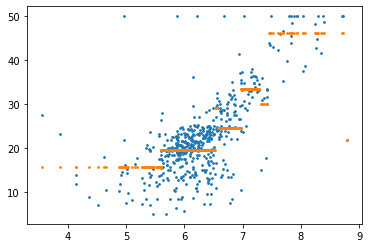

In [30]:
plt.scatter(x_rm,y_medv,s=3)
plt.scatter(x_rm,tree,s=3)

<AxesSubplot:xlabel='tree'>

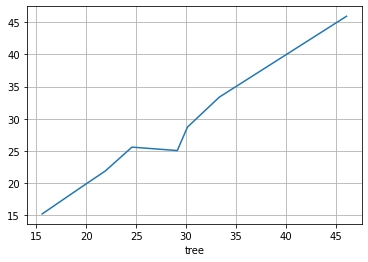

In [38]:
df = pd.DataFrame()
df['tree'] = tree
df['y'] = y_medv
df.groupby('tree')['y'].mean().plot(grid=True)

Lo mismo para `LSTAT` con respecto a `MEDV` pero usando 6 nodos terminales

C:\Users\nuno\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

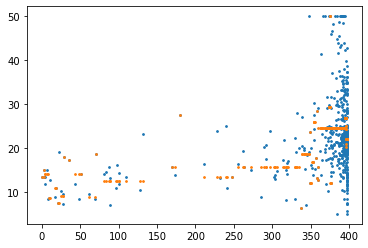

<AxesSubplot:xlabel='tree'>

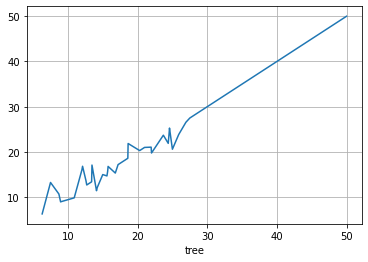

In [40]:
X, y_medv =  load_boston(return_X_y=True)
x_lstat = X[:,11] #la quinta variable es RM
X,x,Y,y=train_test_split(x_lstat,y_medv,test_size=0.3)
DTR=DecisionTreeRegressor(max_depth=6)
DTR.fit(X.reshape(-1,1),Y.reshape(-1,1))
tree = DTR.predict(x_lstat.reshape(-1,1))
plt.scatter(x_lstat,y_medv,s=3)
plt.scatter(x_lstat,tree,s=3)
plt.show()
df = pd.DataFrame()
df['tree'] = tree
df['y'] = y_medv
df.groupby('tree')['y'].mean().plot(grid=True)